# Assignement 2
## Due May 3st

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Exercise 1

Here we define the function that will generate our data

In [4]:
def get_gaussian2d_data_with_labels(n1, n2):
    
    # This is to garantee that we all have the same data points
    np.random.seed(n1+n2)
    
    mu1 = [1, 1]
    var1 = [[0.2, 0],
            [0, 0.2]]
    
    mu2 = [3, 1]
    var2 = [[2, 0],
            [0, 2]]
    
    data = np.concatenate([np.random.multivariate_normal(mu1, var1, n1),
                           np.random.multivariate_normal(mu2, var2, n2)])
    
    labels = np.concatenate([np.repeat(1, n1),
                             np.repeat(2, n2)])
                           
    return data, labels  

## a)

Create train dataset and plot it

In [5]:
train_n1, train_n2 = 25, 25
train_data, train_labels = get_gaussian2d_data_with_labels(train_n1, train_n2)

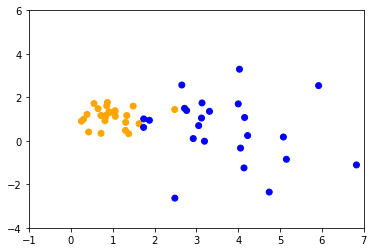

In [6]:
fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in train_labels]
plt.scatter(train_data[:, 0], train_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

Create test dataset and plot it

In [57]:
# test_n1, test_n2
# test_data, test_labels

## b)

Define knn and predict with $k = 3$ and plot the result

In [59]:
def knnClassify(train_data, train_labels, test_data, k=1):
    
    pass

In [60]:
# pred_labels = 

## c)

Plot the correct predictions in black and the wrong one in red

In [8]:
# correct_preds = 

## d)

define the empirical risk with 0-1-loss and compute the 0-1 loss for the labels predicted above

In [9]:
def empRiskWith01loss(test_labels, pred_labels):
   
    Pass

In [10]:
empRiskWith01loss(test_labels, pred_labels)

NameError: name 'test_labels' is not defined

Compute the risk for various k and plot it

In [1]:
ks = [1, 3, 5, 7, 10, 15, 20]

### e)

Create train dataset with n1 = n2 = 500, plot it and repeat the same analysis as in d)

In [36]:
# train_n1, train_n2 = 
# train_data, train_labels = 

### f)

Create train dataset with n1 = n2 = 1000, plot it and repeat the same analysis as in d)

In [11]:
# train_n1, train_n2
# train_data, train_labels = 

# Exercise 2
Load data and show one class

In [42]:
train_df = pd.read_csv('train.csv', sep='\t',)
train_data = train_df.drop(['Label'], axis=1).as_matrix()
train_labels = train_df['Label'].as_matrix()
test_df = pd.read_csv('test.csv', sep='\t')
test_data = test_df.drop(['Label'], axis=1).as_matrix()
test_labels = test_df['Label'].as_matrix()

## a)

Find out if the dataset is balanced

## b)

Compute knn for the USPS dataset

In [12]:
ks = range(1,20)